In [4]:
!pip install pandas numpy requests nltk scikit-learn matplotlib seaborn wordcloud beautifulsoup4

  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.4-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached matplotlib-3.10.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.5 MB 3.2 MB/s eta 0:00:04
   ------- -------------------------------- 2.1/11.5 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.5 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.4/11.5 MB 3.2 MB/s eta 0:00:03
   ------------ --------------------------- 3.7/11

In [5]:
import pandas as pd
import numpy as np
import requests
import re
import json
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sameer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import os
import pandas as pd

# Define the folder path where CSV files are stored
data_path = r"E:\Youtube_Abuse_Detection\Data"

# Get list of all CSV files in the folder
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Print file names to verify
print("Found CSV files:", csv_files)


Found CSV files: ['Youtube01-Psy.csv', 'Youtube02-KatyPerry.csv', 'Youtube03-LMFAO.csv', 'Youtube04-Eminem.csv', 'Youtube05-Shakira.csv']


In [8]:
# Create an empty list to store individual DataFrames
dfs = []

# Loop through each CSV file and load it into a DataFrame
for file in csv_files:
    file_path = os.path.join(data_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)  # Append each dataframe to the list

# Combine all dataframes into one
combined_df = pd.concat(dfs, ignore_index=True)

# Display the first 5 rows
print(combined_df.head())

# Check dataset size
print("Total Rows:", combined_df.shape[0])
print("Total Columns:", combined_df.shape[1])


                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  
Total Rows: 1956
Total Columns: 5


In [10]:
# Save as a new CSV file
combined_df.to_csv(r"E:\Youtube_Abuse_Detection\Data/combined_youtube_spam.csv", index=False)

print("Combined dataset saved successfully!")


Combined dataset saved successfully!


# Data Cleaning

### Load the Combined Data

In [11]:
import pandas as pd

# Load the combined dataset
df = pd.read_csv(r"E:\Youtube_Abuse_Detection\Data\combined_youtube_spam.csv")

# Check basic info
print(df.info())

# Display first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB
None
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ..

### Checck Missing Values

In [12]:
# Check for missing values
print(df.isnull().sum())

# Drop missing values if necessary
df.dropna(inplace=True)


COMMENT_ID      0
AUTHOR          0
DATE          245
CONTENT         0
CLASS           0
dtype: int64


### Remove Duplicates

In [13]:
# Check for duplicate rows
print("Duplicate Rows:", df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)


Duplicate Rows: 1


### Check Data Types &  Convert if Needed

In [15]:
# Check column data types
print(df.dtypes)

# Convert necessary columns (if needed)


COMMENT_ID    object
AUTHOR        object
DATE          object
CONTENT       object
CLASS          int64
dtype: object


# Exploratory Data Analysis (EDA)

### Load And Check Data

In [23]:
import pandas as pd

# Load dataset
file_path = "combined_youtube_spam.csv"  # Update the path if needed
df = pd.read_csv(r"E:\Youtube_Abuse_Detection\Data\combined_youtube_spam.csv")

# Display first few rows
print(df.head())

# Check dataset information
print(df.info())

# Check for missing values
print(df.isnull().sum())

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries

In [25]:
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
print(df.columns)

Index(['comment_id', 'author', 'date', 'content', 'class'], dtype='object')


### Visualize Spam vs Non-Spam Distribution

C:\Users\Sameer\AppData\Local\Temp\ipykernel_18028\1108096252.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette="coolwarm")


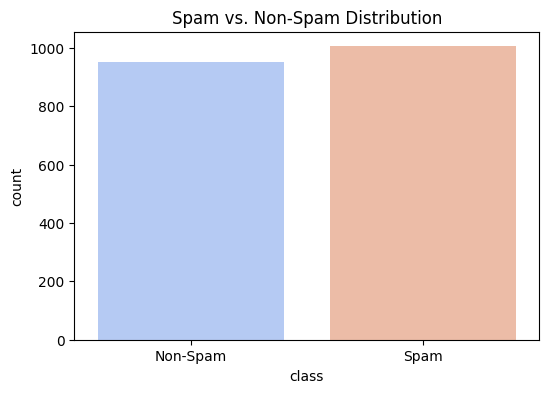

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for spam vs. non-spam
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"])
plt.title("Spam vs. Non-Spam Distribution")
plt.show()


### Text Length Analysis

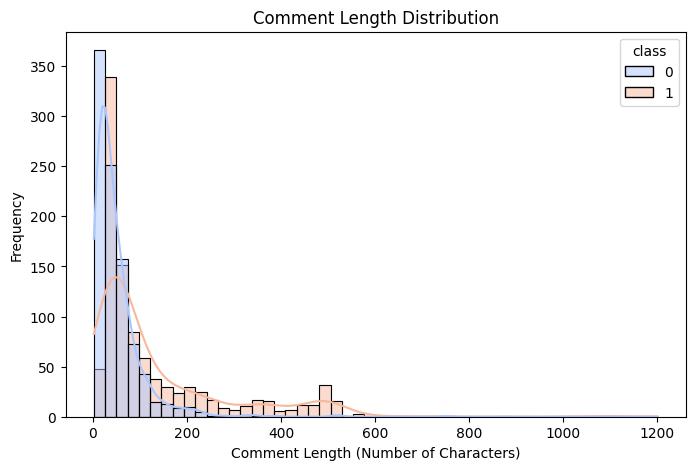

In [27]:
df["comment_length"] = df["content"].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="comment_length", hue="class", bins=50, kde=True, palette="coolwarm")
plt.title("Comment Length Distribution")
plt.xlabel("Comment Length (Number of Characters)")
plt.ylabel("Frequency")
plt.show()


### Word Cloud for Spam vs. Non-Spam Words

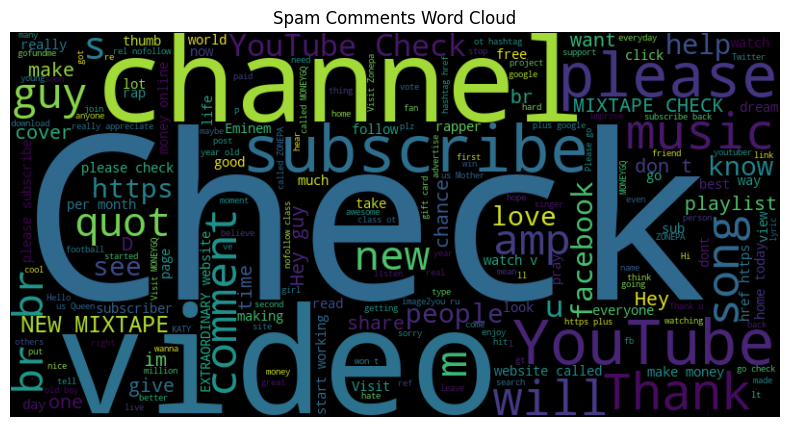

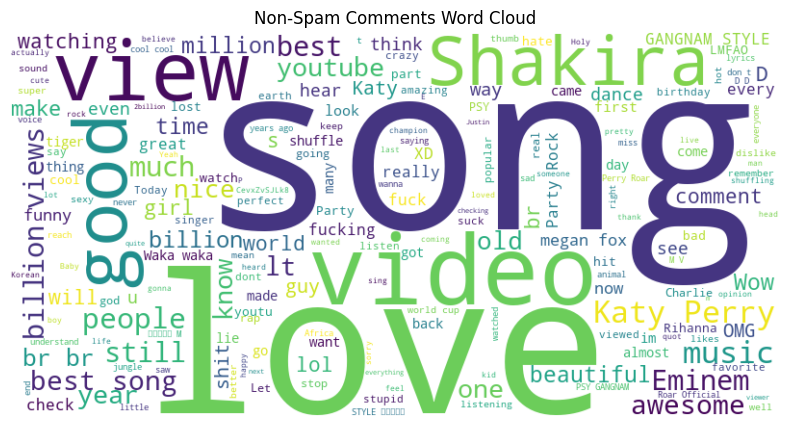

In [28]:
from wordcloud import WordCloud

# Join all spam and non-spam comments
spam_text = " ".join(df[df["class"] == 1]["content"])
non_spam_text = " ".join(df[df["class"] == 0]["content"])

# Generate word clouds
spam_wc = WordCloud(width=800, height=400, background_color="black").generate(spam_text)
non_spam_wc = WordCloud(width=800, height=400, background_color="white").generate(non_spam_text)

# Plot spam word cloud
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Spam Comments Word Cloud")
plt.show()

# Plot non-spam word cloud
plt.figure(figsize=(10, 5))
plt.imshow(non_spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Non-Spam Comments Word Cloud")
plt.show()


### Sentiment Analysis
#### Are spam comments more negative?

In [31]:
!pip install textblob

Using cached textblob-0.19.0-py3-none-any.whl (624 kB)


C:\Users\Sameer\AppData\Local\Temp\ipykernel_18028\4163876515.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="class", y="sentiment", data=df, palette="coolwarm")


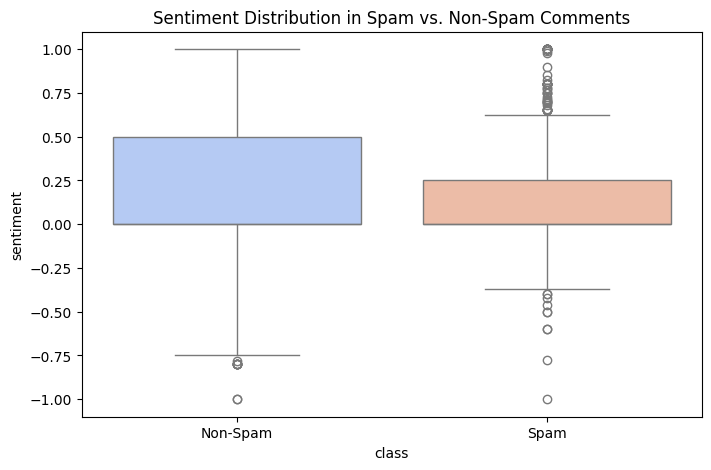

class
0    0.221669
1    0.137609
Name: sentiment, dtype: float64


In [32]:
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity  # Convert to string to handle NaN

# Apply function to content column
df["sentiment"] = df["content"].apply(get_sentiment)

# Plot sentiment distribution for spam vs. non-spam
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="class", y="sentiment", data=df, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=["Non-Spam", "Spam"])
plt.title("Sentiment Distribution in Spam vs. Non-Spam Comments")
plt.show()

# Average sentiment per class
print(df.groupby("class")["sentiment"].mean())


In [35]:
df.to_csv(r"E:\Youtube_Abuse_Detection\Output\sentiment_analysis_results.csv", index=False)
print("Sentiment analysis results saved successfully!")

Sentiment analysis results saved successfully!


### Keyword Frequency Analysis 
#### Common Words in Spam

C:\Users\Sameer\AppData\Local\Temp\ipykernel_18028\1071172225.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=word_df, palette="Reds_r")


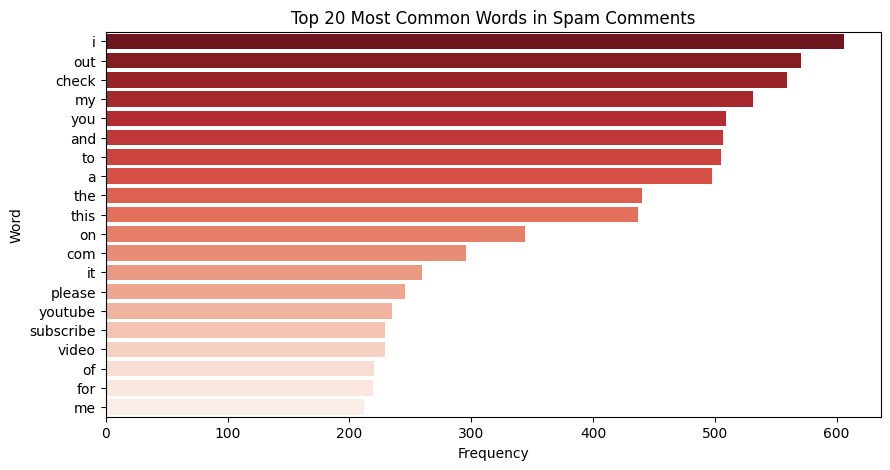

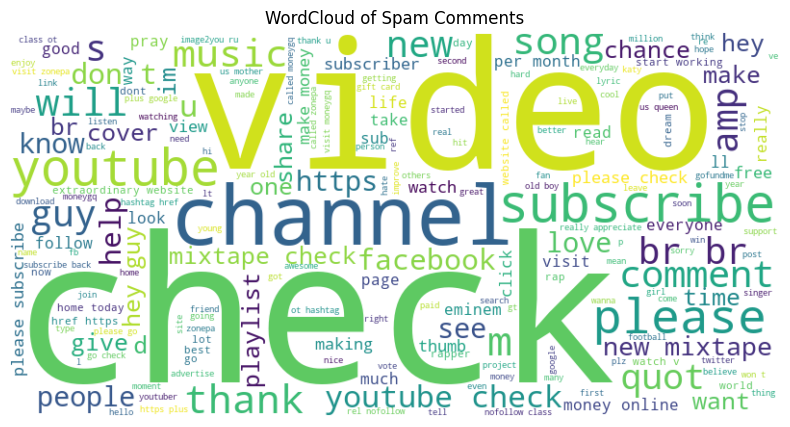

In [33]:
from collections import Counter
import re
from wordcloud import WordCloud

# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    return text

# Filter spam comments
spam_comments = df[df["class"] == 1]["content"].dropna().apply(clean_text)

# Count word frequency
word_counts = Counter(" ".join(spam_comments).split())
common_words = word_counts.most_common(20)

# Convert to DataFrame
import pandas as pd
word_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x="Frequency", y="Word", data=word_df, palette="Reds_r")
plt.title("Top 20 Most Common Words in Spam Comments")
plt.show()

# WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(spam_comments))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Spam Comments")
plt.show()


In [36]:
word_df.to_csv(r"E:\Youtube_Abuse_Detection\Output\spam_keyword_frequency.csv", index=False)
print("Spam keyword frequency saved successfully!")

Spam keyword frequency saved successfully!


### Top Spam Comment Authors

C:\Users\Sameer\AppData\Local\Temp\ipykernel_18028\978983601.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spam_authors.values, y=top_spam_authors.index, palette="Blues_r")


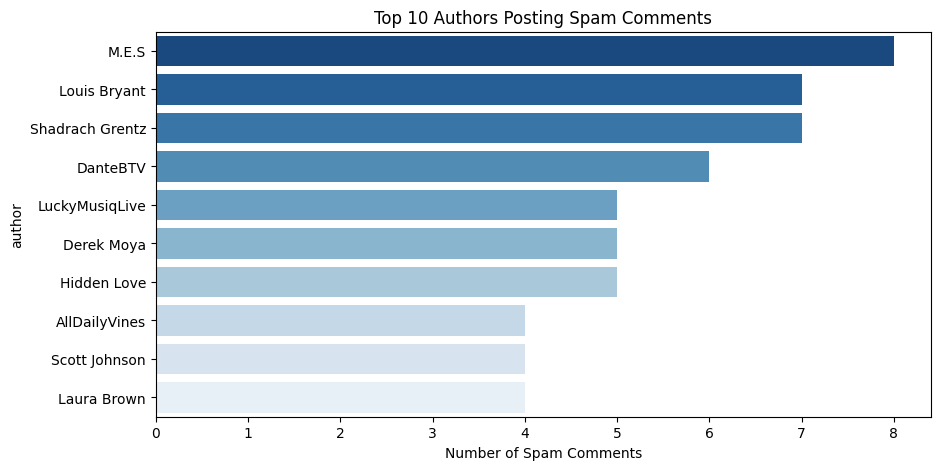

author
M.E.S              8
Louis Bryant       7
Shadrach Grentz    7
DanteBTV           6
LuckyMusiqLive     5
Derek Moya         5
Hidden Love        5
AllDailyVines      4
Scott Johnson      4
Laura Brown        4
Name: count, dtype: int64


In [34]:
# Count number of spam comments per author
top_spam_authors = df[df["class"] == 1]["author"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_spam_authors.values, y=top_spam_authors.index, palette="Blues_r")
plt.title("Top 10 Authors Posting Spam Comments")
plt.xlabel("Number of Spam Comments")
plt.show()

# Print top spam authors
print(top_spam_authors)


In [37]:
top_spam_authors.to_csv(r"E:\Youtube_Abuse_Detection\Output\top_spam_authors.csv", index=True)
print("Top spam authors saved successfully!")

Top spam authors saved successfully!
